In [2]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [10]:
#understanding dataset
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
#data attributes
data=boston.data
for name,index in enumerate(boston.feature_names):
    print(index,name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [13]:
print(data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [14]:
#reshape data
#converts shape (506,) to (506,1)
dataset = data[:,12].reshape(-1,1)
print(dataset.shape)

(506, 1)


In [15]:
#target values
target = boston.target.reshape(-1,1)
target.shape

(506, 1)

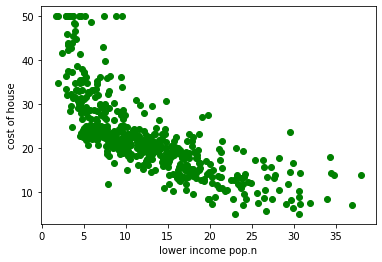

In [17]:
%matplotlib inline
plt.scatter(dataset,target,color='green')
plt.xlabel('lower income pop.n')
plt.ylabel('cost of house')
plt.show()

In [35]:
#regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
reg=lr()
reg.fit(dataset,target)

LinearRegression()

In [36]:
pred=reg.predict(dataset)

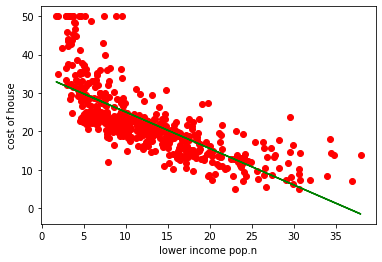

In [37]:
%matplotlib inline
plt.scatter(dataset,target,color='red')
plt.plot(dataset,pred,color='green')
plt.xlabel('lower income pop.n')
plt.ylabel('cost of house')
plt.show()

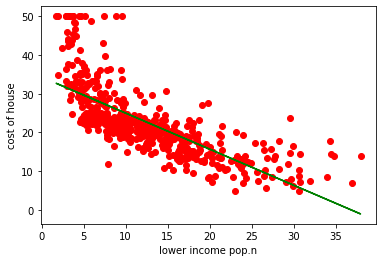

In [26]:
model1=Lasso()
model1.fit(dataset,target)
pred1=model1.predict(dataset)

%matplotlib inline
plt.scatter(dataset,target,color='red')
plt.plot(dataset,pred1,color='green')
plt.xlabel('lower income pop.n')
plt.ylabel('cost of house')
plt.show()

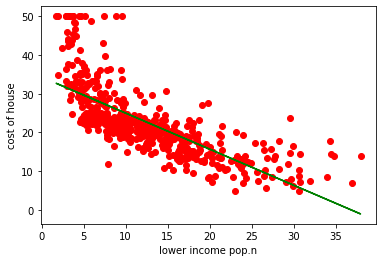

In [27]:
model11=Ridge()
model11.fit(dataset,target)
pred11=model1.predict(dataset)

%matplotlib inline
plt.scatter(dataset,target,color='red')
plt.plot(dataset,pred11,color='green')
plt.xlabel('lower income pop.n')
plt.ylabel('cost of house')
plt.show()

In [38]:
#circumventing curve issue using polynomial model
from sklearn.preprocessing import PolynomialFeatures

#to allow merging of models
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(3),reg) # '3' is the feature

In [39]:
model.fit(dataset,target)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [40]:
pred = model.predict(dataset)

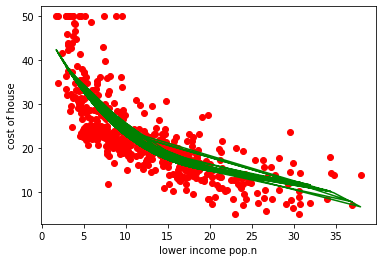

In [41]:

%matplotlib inline
plt.scatter(dataset,target,color='red')
plt.plot(dataset,pred,color='green')
plt.xlabel('lower income pop.n')
plt.ylabel('cost of house')
plt.show()

In [42]:
from sklearn.metrics import r2_score
r2_score(pred,target)

0.47989118102756045